# PRIMER PROYECTO DEL BOOTCAM MACHINE LEARNING

## 1. Elección del conjunto de datos

In [37]:
#importando librerias de trabajo. 
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

In [38]:
# URL de mi fuente de datos
url = 'http://www.geo-ref.net/sp/slv.htm'

# Realizar la solicitud 
response = requests.get(url)
response.raise_for_status() 

# Lee el contenido HTML
soup = BeautifulSoup(response.content, 'html.parser')

# Declaro el nombre de la tabla 
table = soup.select_one('DIV:nth-child(4) > TABLE.tabelle.sortierbar')

# Leo la tabla usando pandas
dfDataDepMun = pd.read_html(str(table))[0]

dfDataDepMun.head(3)

C:\Users\User\AppData\Local\Temp\ipykernel_10220\2570379830.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfDataDepMun = pd.read_html(str(table))[0]


,Municipalidad,HASC,Departamento,Capital,Área (km²),Población,Densidad (pers/km²)
0,Acajutla,SO-AC,Sonsonate,Acajutla,1666,"58 846,0",3532
1,Agua Caliente,CH-AC,Chalatenango,Agua Caliente,1957,"8 726,0",446
2,Aguilares,SS-AG,San Salvador,Aguilares,337,"24 406,0",7238


# 2. Limpieza y transformación de los datos



#### Limpieza

In [39]:
# Cambiar nombres de columnas
dfDataDepMun.columns = ['Municipalidad▲', 'HASC', 'Departamento', 'Capital', 'Área(km²)', 'Población', 'Densidad(pers/km²)']


# Eliminar la fila superior debido a espacios en blanco. 
dfDataDepMun = dfDataDepMun.iloc[1:]

# Filtrar filas según condición
dfDataDepMun = dfDataDepMun[dfDataDepMun['Municipalidad▲'] != 'Última actualización: 17.01.2023 - 22:58:27']
dfDataDepMun = dfDataDepMun[dfDataDepMun['Municipalidad▲'] != 'Total']

# Renombro columna para quitar caracter que no pertence al nombre
dfDataDepMun = dfDataDepMun.rename(columns={
    'Municipalidad▲': 'Municipalidad'
})

#### Transformación

In [40]:
# Limpiar los datos de Densidad y Población, eliminando espacios y comas, y convirtiendo a tipos numéricos
dfDataDepMun['Área(km²)'] = (
    dfDataDepMun['Área(km²)']
    .str.replace(' ', '')  # Eliminar espacios
    .str.replace(',', '.')  # Reemplazar coma por punto
    .astype(float)  # Convertir a tipo float
)

dfDataDepMun['Población'] = (
    dfDataDepMun['Población']
    .str.replace(' ', '')  # Eliminar espacios
    .str.replace(',', '.')  # Reemplazar coma por punto
    .astype(float)  # Convertir a tipo float
)

dfDataDepMun['Densidad(pers/km²)'] = (
    dfDataDepMun['Densidad(pers/km²)']
    .str.replace(' ', '')  # Eliminar espacios
    .str.replace(',', '.')  # Reemplazar coma por punto
    .astype(float)  # Convertir a tipo float
)


# 3. Análisis exploratorio de datos (eda)



In [41]:
ultima_fila = dfDataDepMun.iloc[1]
print(ultima_fila)

Municipalidad            Aguilares
HASC                         SS-AG
Departamento          San Salvador
Capital                  Aguilares
Área(km²)                    337.0
Población                  24406.0
Densidad(pers/km²)          7238.0
Name: 2, dtype: object


In [42]:
#Agrego la validacion para que cuadre con la tabla del conjunto de datos
ultima_fila = dfDataDepMun.iloc[-1]
print(ultima_fila)

Municipalidad            Zaragoza
HASC                        LI-ZA
Departamento          La Libertad
Capital                  Zaragoza
Área(km²)                   227.0
Población                 37086.0
Densidad(pers/km²)         1633.0
Name: 261, dtype: object


In [43]:
# Mostrar el DataFrame resultante con las transformacianes 
dfDataDepMun.head(2)


,Municipalidad,HASC,Departamento,Capital,Área(km²),Población,Densidad(pers/km²)
1,Agua Caliente,CH-AC,Chalatenango,Agua Caliente,1957.0,8726.0,446.0
2,Aguilares,SS-AG,San Salvador,Aguilares,337.0,24406.0,7238.0


In [44]:
print(dfDataDepMun.columns)

Index(['Municipalidad', 'HASC', 'Departamento', 'Capital', 'Área(km²)',
       'Población', 'Densidad(pers/km²)'],
      dtype='object')


# 4. Visualización de resultados



In [45]:
from IPython.display import display, HTML 

# Cálculo de estadísticas solo para la población
poblacion_valor = dfDataDepMun['Población']

# Total de la población 
total_poblacion = poblacion_valor.sum()
# Medias
media_poblacion = poblacion_valor.mean()
# Medianas
mediana_poblacion = poblacion_valor.median()
# Desviaciones estándar
desviacion_std_poblacion = poblacion_valor.std()

# Crear contenido HTML para las tarjetas
resultado_html = f"""
<style>
    .card {{
        border-radius: 10px; 
        padding: 20px; 
        width: 300px; 
        background-color: #f8f9fa; 
        box-shadow: 0 4px 16px rgba(0, 0, 0, 0.2);
        transition: transform 0.3s, box-shadow 0.3s;
        text-align: center;
        margin: 10px; /* Espaciado entre tarjetas */
    }}
    .card:hover {{
        transform: scale(1.05);
        box-shadow: 0 8px 24px rgba(0, 0, 0, 0.3);
    }}
    h4 {{
        margin: 10px 0;
    }}
    p {{
        font-size: 1.5em; 
        margin: 0; 
        color: black;
    }}
</style>

<div style="display: flex; justify-content: center; margin-top: 20px;">
    <div class="card" style="border: 1px solid #00b894;">
        <h4 style="color: #00b894;">🌍 Total de la Población</h4>
        <p>{total_poblacion:.2f}</p>
    </div>
    <div class="card" style="border: 1px solid #00cec9;">
        <h4 style="color: #00cec9;">🔍 Media de la Población</h4>
        <p>{media_poblacion:.2f}</p>
    </div>
    <div class="card" style="border: 1px solid #0984e3;">
        <h4 style="color: #0984e3;">🔍 Mediana de la Población</h4>
        <p>{mediana_poblacion:.2f}</p>
    </div>
    <div class="card" style="border: 1px solid #6c5ce7;">
        <h4 style="color: #6c5ce7;">🔍 Desviación Estándar de la Población</h4>
        <p>{desviacion_std_poblacion:.2f}</p>
    </div>
</div>
"""

# Mostrar las tarjetas
display(HTML(resultado_html))


#### El análisis de la población municipal de El Salvador muestra una media de 25,800 habitantes, lo que sugiere un nivel poblacional relativamente alto. Sin embargo, la mediana de 11,583 indica que la mitad de los municipios tiene menos habitantes, evidenciando que algunos municipios grandes sesgan la media. La desviación estándar de 42,387.24 refleja una gran variabilidad en los tamaños poblacionales, señalando desigualdades en el desarrollo urbano. En resumen, aunque la media indica una población alta, la mediana y la desviación estándar destacan una distribución desigual que requiere atención.




In [46]:
# print("total_poblacion: {}".format(total_poblacion))
# print("media_poblacion: {}".format(media_poblacion))
# print("mediana_poblacion: {}".format(mediana_poblacion))
# print("desviacion_std_poblacion: {}".format(desviacion_std_poblacion))

C:\Users\User\AppData\Local\Temp\ipykernel_10220\4161976102.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Departamento', y='Población', data=dfDataDepMun, palette='viridis')


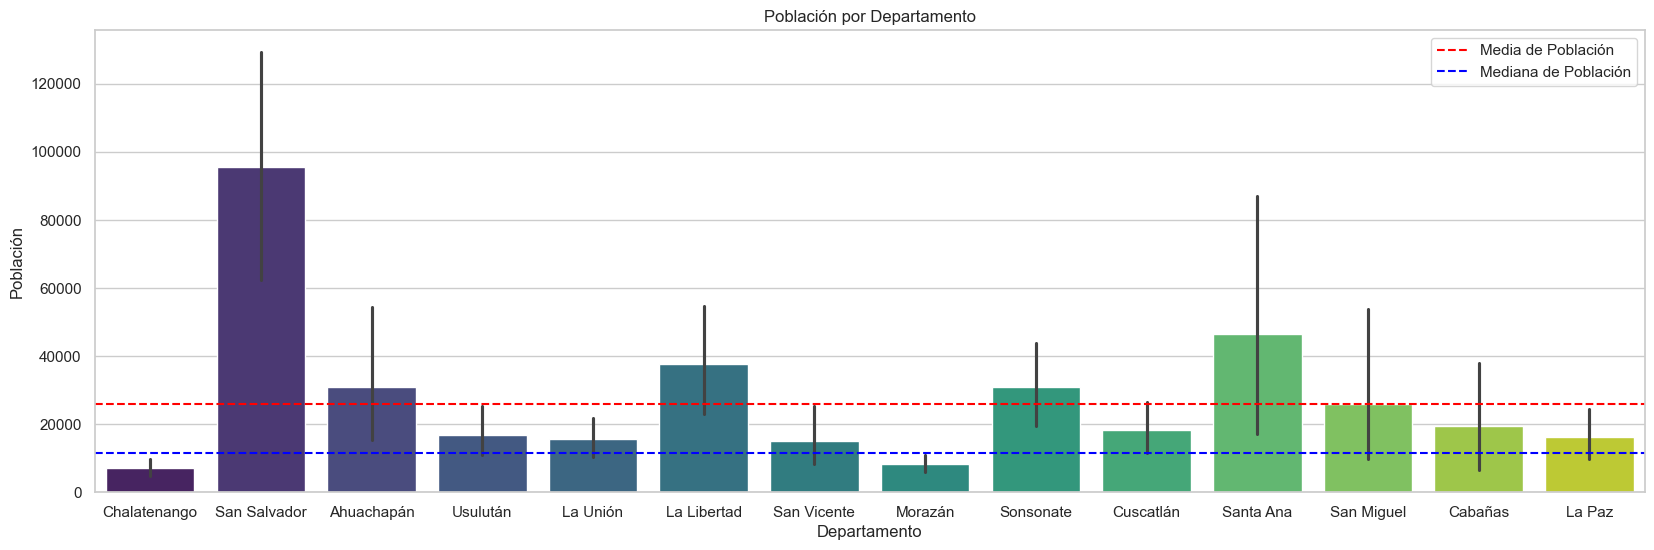

In [47]:

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Gráfica de Población
plt.figure(figsize=(20, 6))
sns.barplot(x='Departamento', y='Población', data=dfDataDepMun, palette='viridis')

# Títulos y etiquetas
plt.title('Población por Departamento')
plt.ylabel('Población')
plt.xlabel('Departamento')

# Agregar líneas para media y mediana
plt.axhline(media_poblacion, color='red', linestyle='--', label='Media de Población')
plt.axhline(mediana_poblacion, color='blue', linestyle='--', label='Mediana de Población')

# Añadir leyenda
plt.legend()

# Mostrar la gráfica
plt.show()